# Pandas 基础使用

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from pyecharts import Bar
from pyecharts import online

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 让 pyecharts 在 jupyter 下载时有图片
online()

## 解决中文显示问题

In [2]:
import matplotlib
from matplotlib.font_manager import FontProperties 
config_path = matplotlib.matplotlib_fname() #将会获得matplotlib包所在文件夹
print(config_path)

# 查看常见注册字体 
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

font_path="/Library/Fonts/msyh.ttf"
my_font = matplotlib.font_manager.FontProperties(fname=font_path)
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams["font.family"] = my_font.get_name()


/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


# 读取 csv 文件并做图

In [3]:
data = pd.read_csv("/Users/weduoo/Downloads/wechat-zhang.csv")
data.head()

,TableVer,MesLocalID,MesSvrID,CreateTime,Message,Status,ImgStatus,Type,Des,TypeCN,CU
0,1,1,7.469703e+18,1480383813,我是🆙 维罗尼卡,4,1,1,1,文本信息,11
1,1,2,7.589791e+18,1480391368,你已添加了🆙 维罗尼卡，现在可以开始聊天了。,4,1,10000,1,系统消息,100001
2,1,3,4.217331e+18,1480391369,如果陌生人主动添加你为朋友，请谨慎核实对方身份。,4,1,10000,1,系统消息,100001
3,1,4,1.847328e+18,1480391937,你好( ^_^)／,4,1,1,1,文本信息,11
4,1,5,1.318922e+18,1480392085,你好,2,1,1,0,文本信息,10


In [4]:
# 添加字数统计列
data["MessageLen"] = data["Message"].str.len()
data.head()

,TableVer,MesLocalID,MesSvrID,CreateTime,Message,Status,ImgStatus,Type,Des,TypeCN,CU,MessageLen
0,1,1,7.469703e+18,1480383813,我是🆙 维罗尼卡,4,1,1,1,文本信息,11,8
1,1,2,7.589791e+18,1480391368,你已添加了🆙 维罗尼卡，现在可以开始聊天了。,4,1,10000,1,系统消息,100001,22
2,1,3,4.217331e+18,1480391369,如果陌生人主动添加你为朋友，请谨慎核实对方身份。,4,1,10000,1,系统消息,100001,24
3,1,4,1.847328e+18,1480391937,你好( ^_^)／,4,1,1,1,文本信息,11,9
4,1,5,1.318922e+18,1480392085,你好,2,1,1,0,文本信息,10,2


## 对每条聊天长度的统计
即每条信息长度在0-3的消息的总量

In [5]:
# 对聊天用于长度的分桶统计
word_bin=[0,3,10,40,150,300,600,12000]
word_labels=["三言两语(0-3)", "言简意赅(3-10)", "名言警句(10-40)",\
             "唐诗宋词(40-150)", "吟诗作画(150-300)", "出口成章(300-600)", "滔滔不觉"]
# word_labels=["三言两语", "言简意赅", "名言警句",\
#              "唐诗宋词", "吟诗作画", "出口成章", "滔滔不觉"]
data["bins"] = pd.cut(data["MessageLen"][data["Type"] == 1],word_bin,labels=word_labels)
data[data["Type"] == 1].head()

,TableVer,MesLocalID,MesSvrID,CreateTime,Message,Status,ImgStatus,Type,Des,TypeCN,CU,MessageLen,bins
0,1,1,7.469703e+18,1480383813,我是🆙 维罗尼卡,4,1,1,1,文本信息,11,8,言简意赅(3-10)
3,1,4,1.847328e+18,1480391937,你好( ^_^)／,4,1,1,1,文本信息,11,9,言简意赅(3-10)
4,1,5,1.318922e+18,1480392085,你好,2,1,1,0,文本信息,10,2,三言两语(0-3)
5,1,6,3.542780e+18,1480392190,你在北京读书吗,4,1,1,1,文本信息,11,7,言简意赅(3-10)
6,1,7,8.460508e+18,1480392398,工作,2,1,1,0,文本信息,10,2,三言两语(0-3)


In [15]:
x = list(data[data["Type"] == 1].groupby("Des")["bins"].value_counts().index)
y = list(data[data["Type"] == 1].groupby("Des")["bins"].value_counts())
x_axis = []
y1 =  []
y2 = []
for label,value in zip(x,y):
    category = label[0]
    if category == 1:
        y1.append(value)
        x_axis.append(label[1])
    elif category == 0:
        y2.append(value)

print(x_axis,y1,y2)
bar = Bar("聊天词长统计")
bar.add("YOU", x_axis, y1, is_label_show=True,xaxis_rotate=30)
bar.add("ME", x_axis, y2+[0]*(len(y1)-len(y2)),is_label_show=True,xaxis_rotate=30)
bar

['言简意赅(3-10)', '三言两语(0-3)', '名言警句(10-40)', '唐诗宋词(40-150)', '吟诗作画(150-300)', '滔滔不觉', '出口成章(300-600)'] [5348, 3171, 955, 15, 2, 2, 1] [3821, 3038, 1054, 91, 7, 1]


## 对聊天消息类型数量统计

In [16]:
from pyecharts import Bar
x = list(data.groupby("Des")["TypeCN"].value_counts().index)
y = list(data.groupby("Des")["TypeCN"].value_counts())
x_axis = []
y1 =  []
y2 = []
for label,value in zip(x,y):
    category = label[0]
    if category == 1:
        y1.append(value)
        x_axis.append(label[1])
    elif category == 0:
        y2.append(value)

print(x_axis,y1,y2)
bar = Bar("聊天统计")
bar.add("YOU", x_axis, y1, is_label_show=True)
bar.add("ME", x_axis, y2+[0]*(len(y1)-len(y2)),is_label_show=True)
bar

['文本信息', '表情', '图片', '链接', '系统消息', '小视频', '名片', '撤回并修改', '语音'] [9494, 515, 282, 60, 40, 8, 4, 1, 1] [8012, 315, 212, 91, 3, 2]


## 将日期处理成星期与时间

In [17]:
# 时间处理，将时间戳转换成日期及其时间，并转换成当前时区时间
data["CreateTime"].dtype
data["DateTime"]=pd.to_datetime(data['CreateTime'], unit="s",box=True,utc=True).dt.tz_convert('Asia/Shanghai')
data["Time"] = pd.to_datetime(data['DateTime'], unit="s").dt.time
data.head(5)

,TableVer,MesLocalID,MesSvrID,CreateTime,Message,Status,ImgStatus,Type,Des,TypeCN,CU,MessageLen,bins,DateTime,Time,Hour,hour_bins,week,day
0,1,1,7.469703e+18,1480383813,我是🆙 维罗尼卡,4,1,1,1,文本信息,11,8,言简意赅(3-10),2016-11-29 09:43:33+08:00,09:43:33,9,8-10点,星期一,29
1,1,2,7.589791e+18,1480391368,你已添加了🆙 维罗尼卡，现在可以开始聊天了。,4,1,10000,1,系统消息,100001,22,NaN,2016-11-29 11:49:28+08:00,11:49:28,11,10-12点,星期一,29
2,1,3,4.217331e+18,1480391369,如果陌生人主动添加你为朋友，请谨慎核实对方身份。,4,1,10000,1,系统消息,100001,24,NaN,2016-11-29 11:49:29+08:00,11:49:29,11,10-12点,星期一,29
3,1,4,1.847328e+18,1480391937,你好( ^_^)／,4,1,1,1,文本信息,11,9,言简意赅(3-10),2016-11-29 11:58:57+08:00,11:58:57,11,10-12点,星期一,29
4,1,5,1.318922e+18,1480392085,你好,2,1,1,0,文本信息,10,2,三言两语(0-3),2016-11-29 12:01:25+08:00,12:01:25,12,10-12点,星期一,29


## 对每天时间段聊天数量统计
即在18-20点发送的消息总量

In [18]:
hour_bins = [i for i in range(0,26,2)]
hour_labels = [str(i) + "-" + str(i+2) + "点" for i in range(0,24,2)]
print(hour_bins)
data["Hour"] = pd.to_datetime(data['DateTime'], unit="s").dt.hour
data["hour_bins"] = pd.cut(data["Hour"],hour_bins,labels=hour_labels)
data.head()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]


,TableVer,MesLocalID,MesSvrID,CreateTime,Message,Status,ImgStatus,Type,Des,TypeCN,CU,MessageLen,bins,DateTime,Time,Hour,hour_bins,week,day
0,1,1,7.469703e+18,1480383813,我是🆙 维罗尼卡,4,1,1,1,文本信息,11,8,言简意赅(3-10),2016-11-29 09:43:33+08:00,09:43:33,9,8-10点,星期一,29
1,1,2,7.589791e+18,1480391368,你已添加了🆙 维罗尼卡，现在可以开始聊天了。,4,1,10000,1,系统消息,100001,22,NaN,2016-11-29 11:49:28+08:00,11:49:28,11,10-12点,星期一,29
2,1,3,4.217331e+18,1480391369,如果陌生人主动添加你为朋友，请谨慎核实对方身份。,4,1,10000,1,系统消息,100001,24,NaN,2016-11-29 11:49:29+08:00,11:49:29,11,10-12点,星期一,29
3,1,4,1.847328e+18,1480391937,你好( ^_^)／,4,1,1,1,文本信息,11,9,言简意赅(3-10),2016-11-29 11:58:57+08:00,11:58:57,11,10-12点,星期一,29
4,1,5,1.318922e+18,1480392085,你好,2,1,1,0,文本信息,10,2,三言两语(0-3),2016-11-29 12:01:25+08:00,12:01:25,12,10-12点,星期一,29


In [19]:
from pyecharts import Bar
x = list(data.groupby("Des")["hour_bins"].value_counts().index)
y = list(data.groupby("Des")["hour_bins"].value_counts())
x_axis = []
y1 =  []
y2 = []
for label,value in zip(x,y):
    category = label[0]
    if category == 1:
        y1.append(value)
    elif category == 0:
        y2.append(value)
        x_axis.append(label[1])

print(x_axis,y1,y2)
bar = Bar("聊天时间段统计")
bar.add("YOU", x_axis, y1+ [0]*(len(x_axis)-len(y1)), is_label_show=True)
bar.add("ME", x_axis, y2 + [0]*(len(x_axis)-len(y2)),is_label_show=True)
bar

['18-20点', '16-18点', '20-22点', '14-16点', '8-10点', '10-12点', '12-14点', '22-24点', '6-8点', '4-6点'] [1986, 1868, 1464, 1449, 1056, 752, 728, 721, 309] [1598, 1531, 1230, 1192, 876, 680, 591, 563, 296, 2]


## 对一周每天聊天数据量统计
即在周一或者周日这天发送的消息总量

In [20]:
def dayofweek(x):
    week = {0:"星期日",1:"星期一",2:"星期二",3:"星期三",4:"星期四",5:"星期五",6:"星期六"}
    return week[x]
data["week"] = data["DateTime"].dt.dayofweek.apply(dayofweek)
from pyecharts import Bar
x = list(data.groupby("Des")["week"].value_counts().index)
y = list(data.groupby("Des")["week"].value_counts())
x_axis = []
y1 =  []
y2 = []
for label,value in zip(x,y):
    category = label[0]
    if category == 1:
        y1.append(value)
    elif category == 0:
        y2.append(value)
        x_axis.append(label[1])

print(x_axis,y1,y2)
bar = Bar("聊天时间段-星期统计")
bar.add("YOU", x_axis, y1+ [0]*(len(x_axis)-len(y1)), is_label_show=True)
bar.add("ME", x_axis, y2 + [0]*(len(x_axis)-len(y2)),is_label_show=True)
bar

['星期一', '星期五', '星期二', '星期三', '星期日', '星期四', '星期六'] [2116, 1816, 1413, 1372, 1363, 1281, 1044] [1778, 1467, 1172, 1158, 1155, 1038, 867]


## 对一月每天聊天量的统计
即每月的1、2、3...号各发送了多少条消息

In [21]:
data["day"] = data["DateTime"].dt.day
from pyecharts import Bar
x = list(data["day"].value_counts().index)
y = list(data["day"].value_counts())

print(x,y)
bar = Bar("聊天时间段-日统计",width=950)
bar.add("Total",x, y, is_label_show=True)
bar

[29, 11, 7, 18, 3, 6, 9, 27, 17, 10, 5, 2, 1, 4, 8, 23, 28, 13, 12, 22, 20, 26, 24, 14, 30, 19, 15, 16, 21, 25, 31] [1798, 1408, 1011, 928, 878, 873, 828, 770, 720, 715, 675, 674, 670, 660, 603, 558, 525, 488, 476, 465, 441, 430, 389, 373, 332, 273, 266, 252, 229, 179, 153]


## 对每天聊天量的统计
从开始到结束每天发送消息的条数

In [41]:
from pyecharts import Line
data["date"] = data["DateTime"].dt.date
y = data.groupby("date").size()
x = list(y.index)
line = Line("日聊天统计:" + str(len(y)) + "天，2016-11-29至2018-4",width=950)
line.add("Total",x, y, is_label_show=True, 
        is_datazoom_show=True, datazoom_type='both',
        datazoom_range=[10, 25],mark_line=["max"],mark_point=["max"])
line

In [43]:
bar = Bar("日聊天统计:" + str(len(y)) + "天，2016-11-29至2018-4",width=950)
bar.add("Total",x, y, is_label_show=True, 
        is_datazoom_show=True, datazoom_type='both',
        datazoom_range=[10, 25],mark_line=["max"],mark_point=["max"])
bar

## 对每天聊天量区间的统计
即有多少天聊天的数量实在0-10条、有多少天在10-50条。

In [55]:
date_bins = [0,10,50,100,200,300,500,1000]
date_labels = [str(date_bins[i]) + "-" + str(date_bins[i+1]) + "条" for i in range(len(date_bins)-1)]
y = data.groupby("date").size()
date_bin_data = pd.cut(y,bins=date_bins,labels=date_labels).value_counts()
x = list(date_bin_data.index)

bar = Bar("每日聊天量区间统计:" + str(len(y))+"天")

bar.add("Total",x, list(date_bin_data), is_label_show=True)
bar

## 对聊天情绪的统计
通过 NLP 处理聊天记录，将每条消息的情感值打分，分数越低表明情绪越消极，分数越高表明情绪越积极，最高分为1分。

**此 NLP 是使用商品评论训练而成，因此对消息的打分也不一定准确**。

In [91]:
from snownlp import SnowNLP
from pandas import DataFrame
words = data[(data["Type"] == 1) & (data["Des"]==1)]["Message"]
emotion_value = []
neg_you = []
for word in words:
    sp = SnowNLP(word).sentiments
    if sp < 0.2:
        neg_you.append(word)
    emotion_value.append(sp)
emotion_df = DataFrame(emotion_value,columns=["emotion"])
    
words_me = data[(data["Type"] == 1) & (data["Des"]==0)]["Message"]
emotion_value_me = []
neg_me = []
for word in words_me:
    sp = SnowNLP(word).sentiments
    if sp < 0.2:
        neg_me.append(word)
    emotion_value_me.append(sp)
emotion_df_me = DataFrame(emotion_value_me,columns=["emotion"])

emotion_bin = [0,0.2,0.3,0.5,0.7,0.85,1]
emotion_labels = [str(emotion_bin[i]) + "-" + str(emotion_bin[i+1]) for i in range(len(emotion_bin)-1)]

date_bin_data = pd.cut(emotion_df["emotion"],bins=emotion_bin,labels=emotion_labels).value_counts()
date_bin_data_me = pd.cut(emotion_df_me["emotion"],bins=emotion_bin,labels=emotion_labels).value_counts()
x = list(date_bin_data.index)

bar = Bar("聊天情感统计")
bar.add("You",x, list(date_bin_data), is_label_show=True)
bar.add("Me",x, list(date_bin_data_me), is_label_show=True)
bar

In [101]:
print(SnowNLP("可是我……唉").sentiments)

0.6382252559726964


## 负面情绪词云图

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def neg_wordcloud(text):
    # 用于支持中文的设置
    font = '/Library/Fonts/Songti.ttc'
    wordcloud = WordCloud(background_color="white",font_path=font,\
                          width=1000, height=1000, margin=2).generate(text)
    # 生成图片
    plt.figure(figsize=(14,14))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

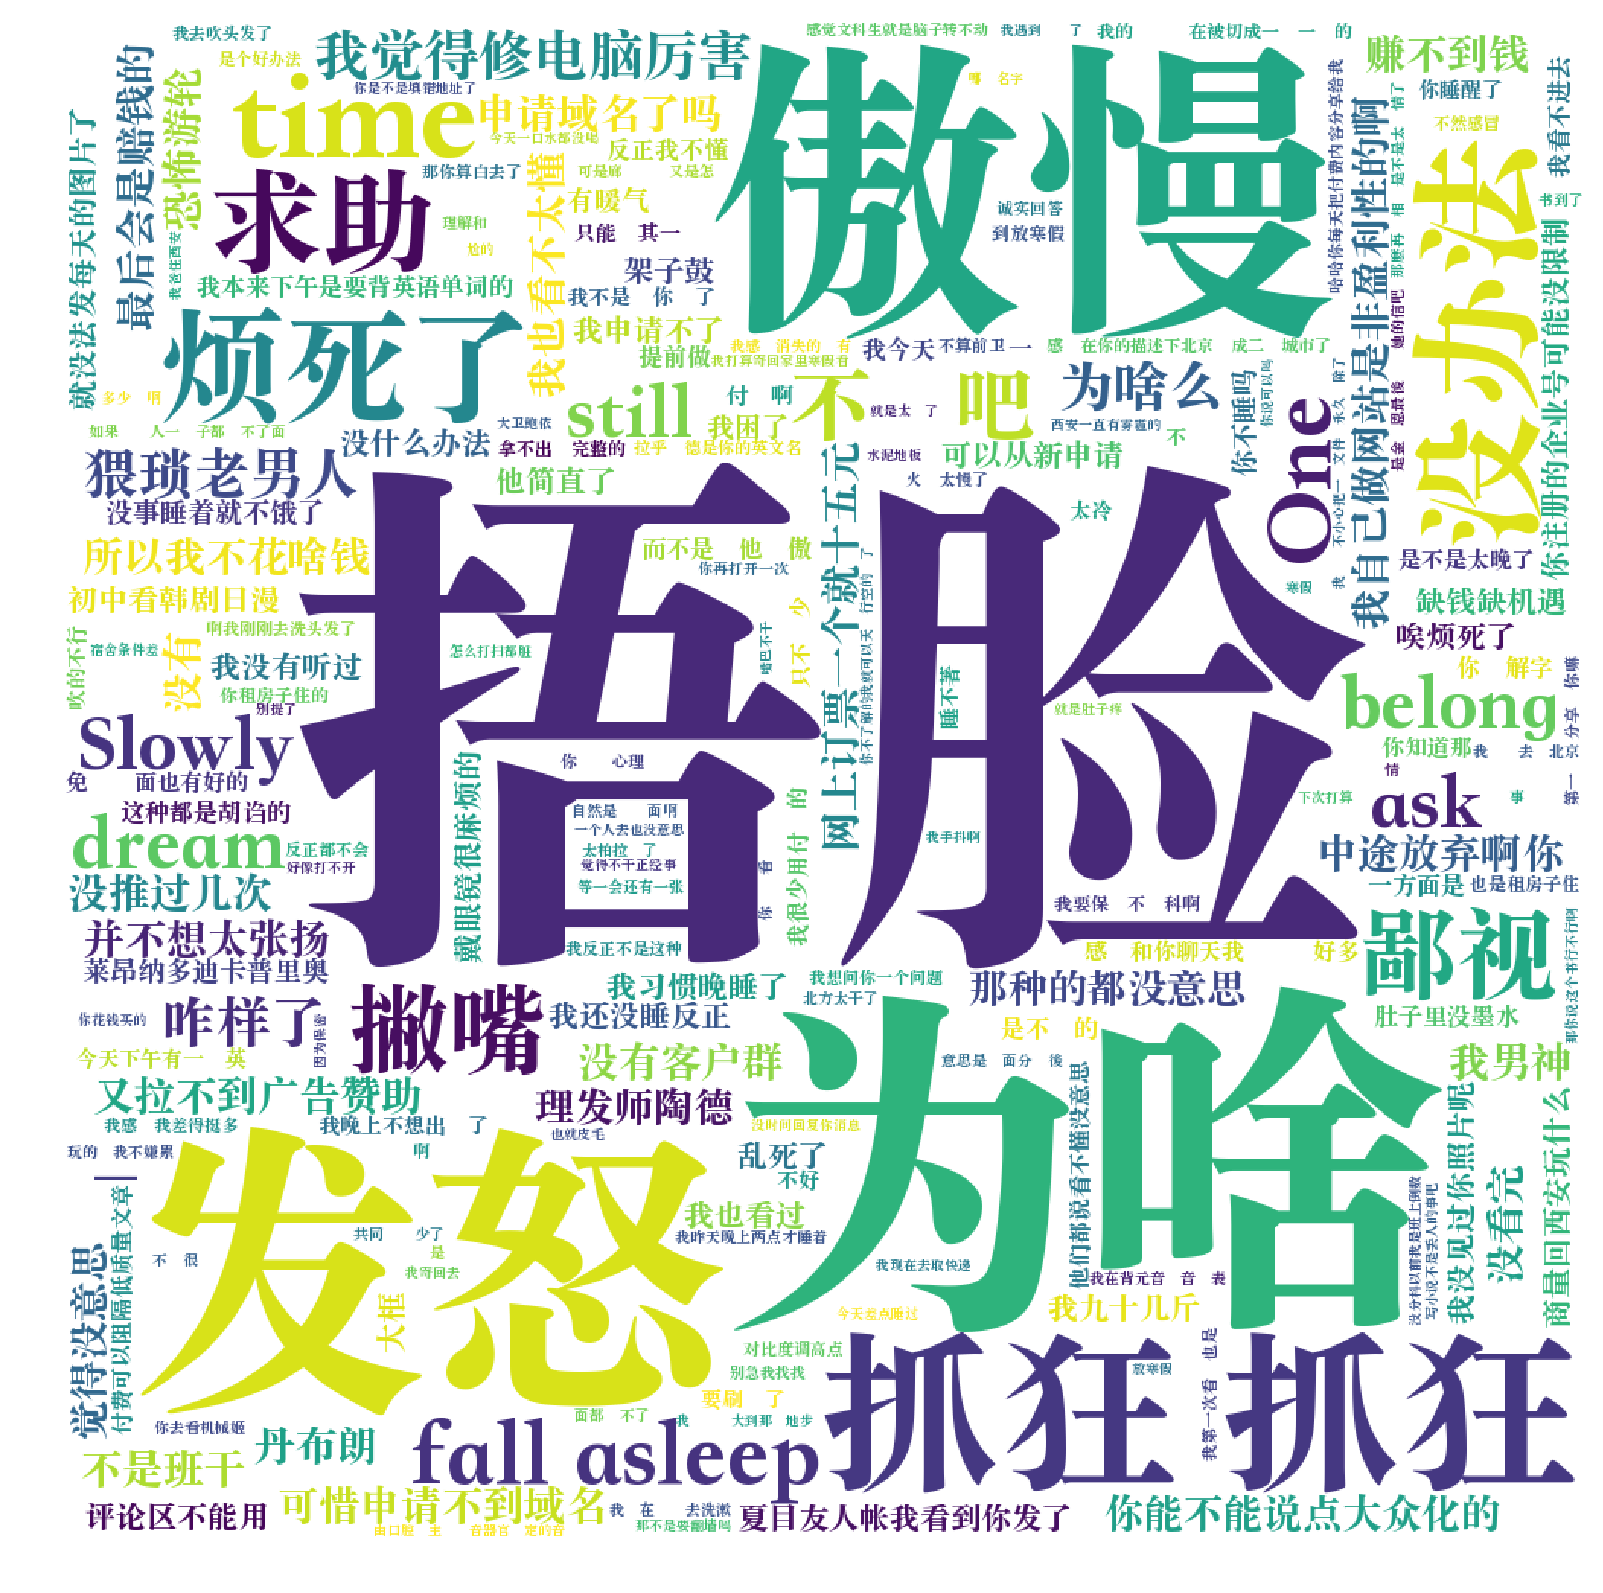

In [93]:
neg_wordcloud("\n".join(neg_you))

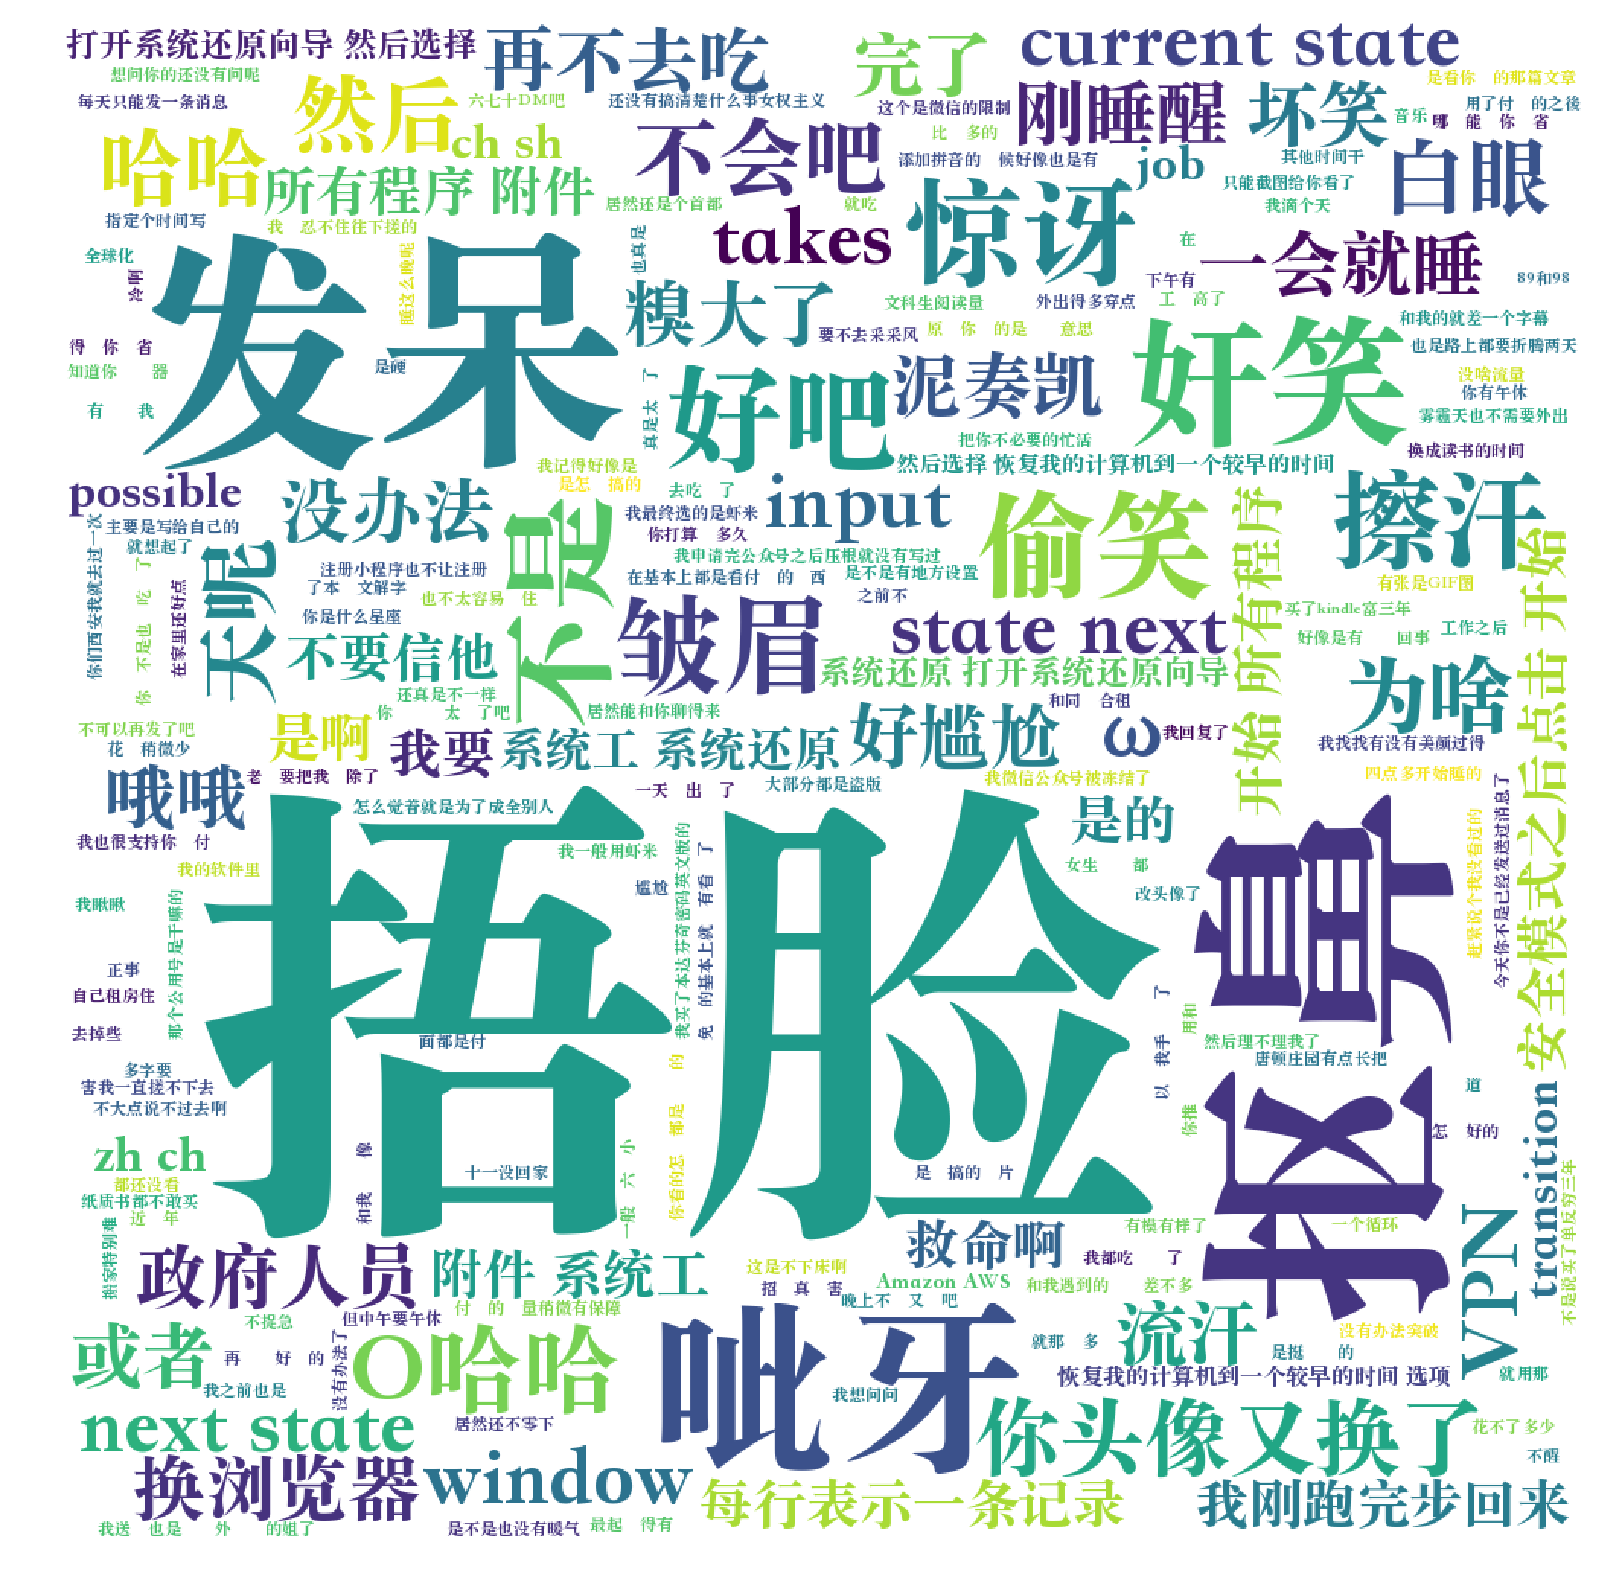

In [95]:
neg_wordcloud("\n".join(neg_me))

# Pandas 中常用方法

### 使用get_dummies进行one-hot编码
离散特征的编码分为两种情况：

1. 离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码

2. 离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}

使用pandas可以很方便的对离散型特征进行one-hot编码

In [149]:
import pandas as pd  
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'class1'],   
            ['red', 'L', 13.5, 'class2'],   
            ['blue', 'XL', 15.3, 'class1']])  
  
df.columns = ['color', 'size', 'prize', 'class label']  
  
size_mapping = {  
           'XL': 3,  
           'L': 2,  
           'M': 1}  
df['size'] = df['size'].map(size_mapping)  
  
class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}  
df['class label'] = df['class label'].map(class_mapping) 

说明：对于有大小意义的离散特征，直接使用映射就可以了，{'XL':3,'L':2,'M':1} 

In [150]:
pd.get_dummies(df)

,size,prize,class label,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


## 相关文章
### 常见方法使用
- [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)
- [Python pandas 数据框的str列内置的方法详解](https://blog.csdn.net/qq_28219759/article/details/52919233)

- [pandas.cut分桶操作](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

### 时间
- [pandas中将timestamp转为datetime](http://www.cnblogs.com/rainduck/p/5914471.html)
- [using time zone in pandas to_datetime](https://stackoverflow.com/questions/42826388/using-time-zone-in-pandas-to-datetime)

### 综合文章
- [使用Pandas对数据进行筛选和排序](http://bluewhale.cc/2016-08-06/use-pandas-filter-and-sort.html)
- [数据清洗（数据合并，重塑，转换，离散化，过滤，采样）](http://blog.csdn.net/zutsoft/article/details/51500066)
- [python - 熊猫用一列代替多个值](https://code.i-harness.com/zh-CN/q/15138a2)

## 问题解决
- [python matplotlib 中文显示参数设置](https://segmentfault.com/a/1190000005144275)

In [2]:
from pyecharts import Map
import numpy as np
value = [73212, 51112, 43581, 39760, 34155, 33952, 33205, 30521, 21473, 20559, \
         20055, 17853, 15887, 15093, 15024, 14990, 13823, 13305, 12520, 12250, \
         10067, 9426, 9222, 8420, 8064, 6289, 5512, 5258, 2363, 2299, 1752, 609, 261, 215, 60]
attr = ['北京', '广东', '山东', '局域', '江苏', '河北', '河南', '浙江', '四川', '辽宁', \
        '陕西', '湖北', '山西', '黑龙江', '福建', '安徽', '上海', '吉林', '湖南', '天津', \
        '江西', '内蒙古', '广西', '云南', '重庆', '新疆', '贵州', '甘肃', '海南', '宁夏', \
        '青海', '香港', '台湾', '西藏', '澳门']
map = Map("甄嬛传评论地区分布",title_pos='center', width=800, height=600)
map.add("", attr, np.array(value)/450, maptype='china', is_visualmap=True,is_label_show=True,
        visual_text_color='#000')
map

In [3]:
from pyecharts import Map
import numpy as np
value = [20832, 12908, 7301, 7143, 7081, 6843, 6320, 5860, 5541, 4086, 3944, 3927,\
         3828, 3447, 3217, 3004, 2609, 2577, 2490, 2486, 2046, 1958, 1845, 1576, 1452,\
         1284, 996, 952, 766, 376, 270, 38, 3, 2]
attr = ['北京', '广东', '河南', '山东', '江苏', '局域', '河北', '浙江', '四川', '上海',\
        '湖北', '山西', '福建', '陕西', '湖南', '辽宁', '江西', '黑龙江', '广西', '安徽',\
        '内蒙古', '云南', '吉林', '天津', '重庆', '贵州', '新疆', '甘肃', '海南', '宁夏', \
        '青海', '西藏', '台湾', '澳门']
map = Map("欢乐颂评论地区分布",title_pos='center', width=800, height=600)
map.add("", attr, np.array(value)/90, maptype='china', is_visualmap=True,is_label_show=True,
        visual_text_color='#000')
map

In [49]:
value = [3233, 582, 213, 158, 85, 67, 58, 44, 37, 36, 33, 32, 10, 5, 3, 2]
attr = ['海淀区', '朝阳区', '西城区', '丰台区', '昌平区', '大兴区', '东城区', '石景山区', '房山区', \
        '通州区', '密云区', '顺义区', '平谷区', '门头沟区', '延庆区', '怀柔区']
map = Map("欢乐颂评论北京地区分布",title_pos='center', width=800, height=600)
map.add("", attr, np.array(value), maptype='北京', is_visualmap=True,is_label_show=True,
        visual_text_color='#000')
map

In [1]:
value = [13082, 4502, 831, 789, 657, 474, 438, 295, 260, 196, 171, 170, 139, 136, 101, 57]
attr = ['海淀区', '朝阳区', '丰台区', '昌平区', '西城区', '东城区', '大兴区', '顺义区', '通州区',\
        '石景山区', '房山区', '密云区', '门头沟区', '平谷区', '延庆区', '怀柔区']
map = Map("甄嬛传评论北京地区分布",title_pos='center', width=850, height=650)
map.add("", attr, np.array(value)/10, maptype='北京', is_visualmap=True,is_label_show=True,
        visual_text_color='#000')
map

NameError: name 'Map' is not defined